In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [60]:
GdpRateDf = pd.read_csv('/Users/thejakamahaulpatha/Desktop/Data Science/Analysis/Project - President/GDP per Capita Growth Rate.csv')
PresidentDf = pd.read_csv('/Users/thejakamahaulpatha/Desktop/Data Science/Analysis/Project - President/Untitled 2.csv')

In [61]:
GdpRateDf.shape

(59, 8)

In [62]:
PresidentDf.shape

(38, 17)

In [63]:
PresidentDf.head()

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,2006,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,1971,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,1974,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league


In [64]:
PresidentDf['Average GDP Growth Rate'] = ""
PresidentDf['Age'] = ""

In [65]:
GdpRateDf.head()

,YEAR,CHINA,UK,INDIA,SL,SINGAPORE,US,Unnamed: 7
0,1961,-27.27,2.677119,3.722743,NaN,8.136888,2.3,NaN
1,1962,-5.58,1.102910,2.931128,3.818020,7.554046,6.1,NaN
2,1963,10.30,4.874384,5.994353,2.516749,10.040621,4.4,NaN
3,1964,18.18,5.533659,7.452950,3.906434,-3.103333,5.8,NaN
4,1965,16.95,2.142177,-2.635770,2.536954,7.834583,6.4,NaN


Lets get the Average GDP growth rate for each president

In [66]:

for ind in PresidentDf.index:
    
        startDate = int(PresidentDf['Year start'][ind])
        endDate = int(PresidentDf['Year end'][ind])        
        
        startIndexArr = GdpRateDf[GdpRateDf['YEAR']==startDate].index.values
        endIndexArr = GdpRateDf[GdpRateDf['YEAR']==endDate].index.values
   
        if startIndexArr.size != 0 and endIndexArr.size !=0:
            startIndex = startIndexArr[0]
            endIndex = endIndexArr[0]
        
        if PresidentDf['Country'][ind] == 'Sri Lanka'and startIndexArr.size != 0 and endIndexArr.size !=0:
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,4].mean()

        elif PresidentDf['Country'][ind] == 'India'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,3].mean()

        elif PresidentDf['Country'][ind] == 'Singapore'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,5].mean()
     
        elif PresidentDf['Country'][ind] == 'United States'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,6].mean()

        elif PresidentDf['Country'][ind] == 'United Kingdom'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,2].mean()
    
        elif PresidentDf['Country'][ind] == 'China'and startIndexArr.size != 0 and endIndexArr.size !=0:   
            PresidentDf.at[ind, 'Average GDP Growth Rate'] = GdpRateDf.iloc[startIndex:endIndex+1,1].mean()
    

In [67]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,2006,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary,,
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,1971,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,1967,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.98853,
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,1974,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,1975,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,
6,NaN,India,Narendra Damodardas Modi,1950,2,2019,2021,1978,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,,
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,1978,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,
8,NaN,India,Manmohan Singh,1932,2,2009,2014,1991,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,
9,NaN,India,Manmohan Singh,1932,1,2004,2008,1991,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,


In [68]:
for ind in PresidentDf.index:
    PresidentDf.at[ind, 'Political Experience ( Years )'] = int(PresidentDf['Year start'][ind]) - int(PresidentDf['Political Experience ( Years )'][ind])
    PresidentDf.at[ind, 'Age'] = int(PresidentDf['Year start'][ind]) - int(PresidentDf['DOB'][ind])
        
        
        

In [69]:
PresidentDf

,ID,Country,Name,DOB,Presidential term,Year start,Year end,Political Experience ( Years ),Educational Background,Professional Background,Political Party,University,Birth Place,Left Hand / Right Handed,Comment(HOS),Comment(start year),Political Experience,Average GDP Growth Rate,Age
0,NaN,Sri Lanka,Gotabaya Rajapaksa,1949,1,2020,2021,14,Army Training,Military,SLFP,Diyathalawa Defence university,"Mathara, Sri Lanka",Right,President,Major,Defence secretary,,71
1,NaN,Sri Lanka,Maithripala Sirisena,1951,1,2015,2019,44,School,Politician,SLFP,None,"Gampaha, Sri Lanka",Right,President,Major,SLFP youth,3.732474,64
2,NaN,Sri Lanka,Mahinda Rajapaksa,1945,2,2010,2014,43,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,6.784341,65
3,NaN,Sri Lanka,Mahinda Rajapaksa,1945,1,2006,2009,39,Law,Politician,SLFP,Law collage,"Hambanthota, Sri Lanka",Right,President,Major,SLFP,5.98853,61
4,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,2,2000,2005,26,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.341063,55
5,NaN,Sri Lanka,Chandrika Bandaranaike Kumaratunga,1945,1,1995,1999,20,Diploma(Phd followed),Politician,SLFP,Institut d'Etudes Politiques de Paris,"Colombo, Sri Lanka",Right,President,Major,Sri lanka womens league,4.940883,50
6,NaN,India,Narendra Damodardas Modi,1950,2,2019,2021,41,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,,69
7,NaN,India,Narendra Damodardas Modi,1950,1,2014,2018,36,Masters,Politician,BJP,Gujarat University,"Bombay, India",Right,Prime Minister,Election year,NaN,7.365239,64
8,NaN,India,Manmohan Singh,1932,2,2009,2014,18,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.808919,77
9,NaN,India,Manmohan Singh,1932,1,2004,2008,13,DPhil,Education,INC,University of Oxford,"Punjab, India",Right,Prime Minister,Election year,NaN,6.930923,72


In [70]:
PresidentDf.dtypes

ID                                float64
Country                            object
Name                               object
DOB                                 int64
Presidential term                   int64
Year start                          int64
Year end                            int64
Political Experience ( Years )      int64
Educational Background             object
Professional Background            object
Political Party                    object
University                         object
Birth Place                        object
Left Hand / Right Handed           object
Comment(HOS)                       object
Comment(start year)                object
Political Experience               object
Average GDP Growth Rate            object
Age                                object
dtype: object

In [99]:
PresidentDf = PresidentDf.dropna(subset=['Average GDP Growth Rate'])

In [104]:
PresidentDf['Average GDP Growth Rate'] = pd.to_numeric(PresidentDf['Average GDP Growth Rate'])
PresidentDf['Age'] = pd.to_numeric(PresidentDf['Age'])
# df['a'].astype(float, errors = 'raise')

In [105]:
PresidentDf.dtypes

ID                                float64
Country                            object
Name                               object
DOB                                 int64
Presidential term                   int64
Year start                          int64
Year end                            int64
Political Experience ( Years )      int64
Educational Background             object
Professional Background            object
Political Party                    object
University                         object
Birth Place                        object
Left Hand / Right Handed           object
Comment(HOS)                       object
Comment(start year)                object
Political Experience               object
Average GDP Growth Rate           float64
Age                                 int64
dtype: object

Age , Political Experience ( Years ) , Educational Background  , Professional Background , Political Party,University, University , Birth Place, Left Hand / Right Handed , 

In [106]:
# Let's First try to do a regression analysis using Age variable only

In [116]:
x = PresidentDf.iloc[:,[18]].values
y = PresidentDf.iloc[:,17].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1) 

In [117]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [118]:
y_pred = regr.predict(x_test)

In [119]:
y_pred

array([6.47129773, 4.8306511 , 4.23405232, 4.38320202, 4.97980079,
       5.57639957, 3.63745355])

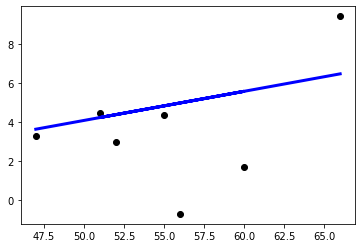

In [122]:
plt.scatter(x_test,y_test,  color='black')
plt.plot(x_test,y_pred, color='blue', linewidth=3)